# 大数据分析
## 第一次作业

## 1. Recall and write down the assumptions which one-way ANOVA are based on.

>1. 数据是随机抽样,且各因变量个案彼此独立
>2. 组间的方差差异不大
>3. 数据符合正态分布

## 2.  Focus on two columns: Category (Col[2]) and Average Age (Col[7]). Taking feature Average Age as an example, we want to measure whether the average age varied significantly across the categories. Clearly state the null (H0) and the alternative (H1) hypotheses for this task.

>1. H0:各组平均年龄总体均数相等
>2. H1:各组平均年龄总体均数不相等或不全相等

__为接下来的分析进行数据准备__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import norm

#读取数据
df = pd.read_csv('data_utf8.csv')
print '数据种类:',df.columns
print '数据总量:',len(df)

数据种类: Index([u'群名', u'群类别', u'群人数', u'消息数', u'稠密度', u'性别比', u'平均年龄', u'年龄差',
       u'地域集中度', u'手机比例', u'会话数', u'无回应比例', u'夜聊比例', u'图片比例'],
      dtype='object')
数据总量: 2040


## 3. a）Draw the empirical probability density funfction of Col[7], i.e. the empirical pdf of average age. Does the data in this dimension follow Gaussian distribution? Test normality of Col[7]

mean: 27.2220125432
std : 4.98657029311


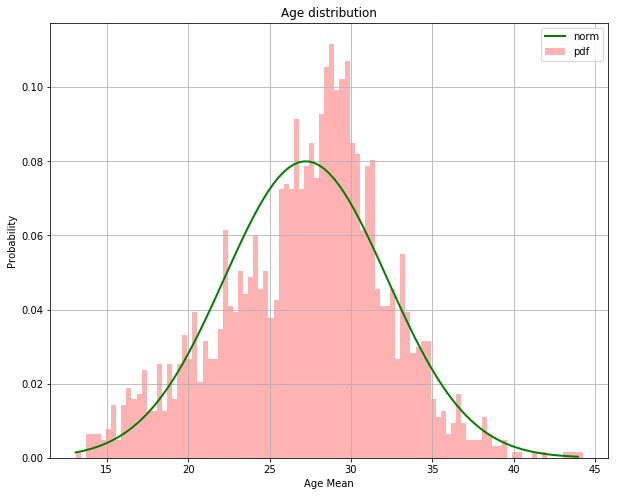

In [2]:
df_age = df['平均年龄']
age_mean = df_age.mean()
age_std = df_age.std()
print 'mean:',age_mean
print 'std :',age_std

size = 100
#切分数据进行分析
x = np.arange( df_age.min() , df_age.max() , (df_age.max() - df_age.min()) / size )
#计算正态分布pdf
y = norm.pdf( x, age_mean, age_std)

#绘图进行初步观察
plt.figure(figsize=(10,8))
#参数 颜色 线宽
plt.plot( x , y , color = 'green' , linewidth = 2 , label='norm' )
#数据 数组 颜色 颜色深浅 组宽 显示频率
plt.hist( df_age , bins = size , color = 'red' , alpha = 0.3 , rwidth = 1 , normed = True , label='pdf' )
plt.title('Age distribution')
plt.xlabel('Age Mean')
plt.ylabel('Probability')
plt.grid( True )
plt.legend()
plt.show()

__使用Q-Q进行定性分析,使用K-S检验进行定量分析__

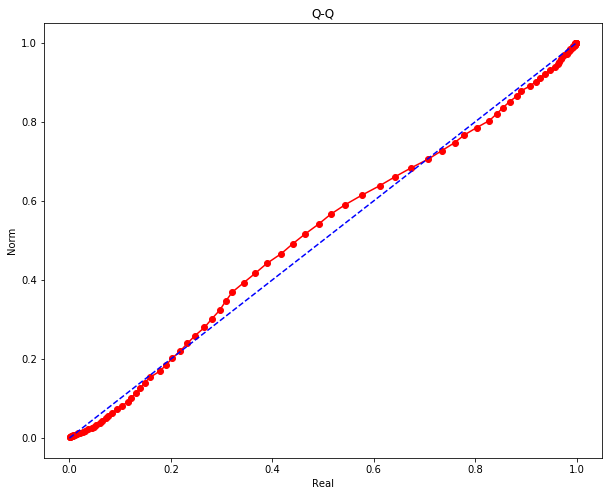

拒绝H0：( 8.01234271375e-06 < 0.05 ) 分布不符合正态分布


In [3]:
#绘制Q-Q图定性检验是否符合正态分布
#实际统计频率
xp = []
for i in range(len(x)):
    xp.append( len(df_age[df_age<=x[i]]) * 1.0 / len(df_age) )
xp = np.array(xp)

#正态分布累计概率
yp = norm.cdf( x, age_mean, age_std)

#绘图查看结果
plt.figure(figsize=(10,8))
plt.plot( xp , yp , 'ro-' )
plt.plot( [0,1] , [0,1] , 'b--' )
plt.title('Q-Q')
plt.xlabel('Real')
plt.ylabel('Norm')
plt.show()

#定量分析
s,p = stats.kstest(df_age, 'norm',args=(df_age.mean(), df_age.std()))
if p < 0.05:
    print '拒绝H0：( ' + str(p) + ' < 0.05 )' + ' 分布不符合正态分布'
else:
    print '接受H0：( ' + str(p) + ' > 0.05 )' + ' 分布符合正态分布'

__由上述Q-Q图定性分析和ks检验定量分析，可以定性认定Col[7]（平均年龄）分布不符合正态分布__

## 3. b）In Col[7], there are 5 components divided by category labels. We denote the data in Col[7] with category i (where i = 1,…,5) as Col[7|categoty=i]. Test the normality of each components and test the homogeneity of variances.


第1组:
mean: 23.4042779593
std : 4.92375713739
var : 24.243384348
p-value: 0.271088788744


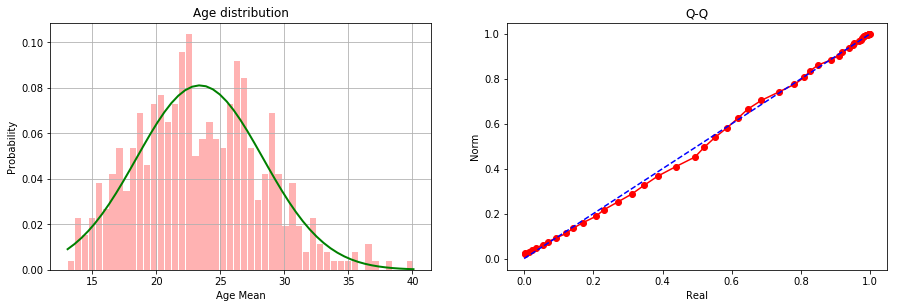

----------------------------------------------------------------------
第2组:
mean: 29.6181934963
std : 5.21737087936
var : 27.2209588928
p-value: 0.591578871998


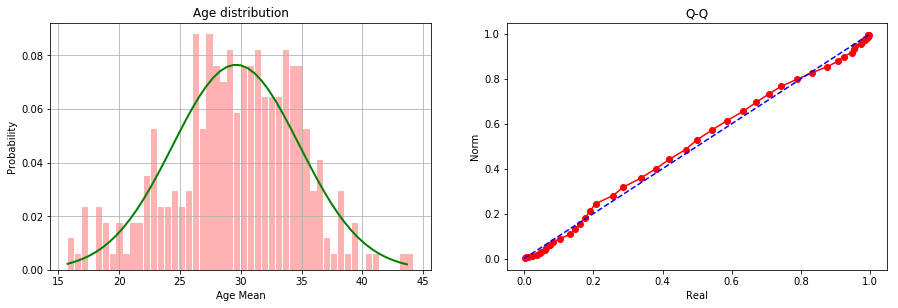

----------------------------------------------------------------------
第3组:
mean: 30.7915340161
std : 2.55290128692
var : 6.51730498073
p-value: 0.749231763176


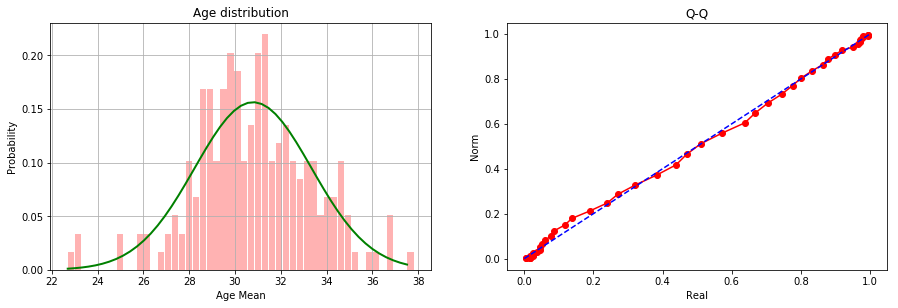

----------------------------------------------------------------------
第4组:
mean: 26.255317865
std : 5.09825586997
var : 25.9922129157
p-value: 0.0190132170977


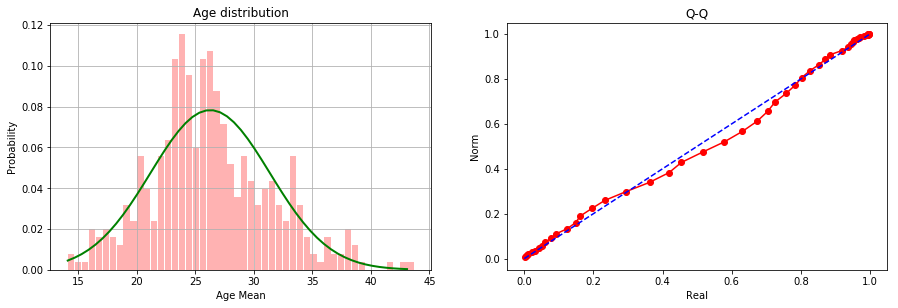

----------------------------------------------------------------------
第5组:
mean: 28.5450807042
std : 3.01897880509
var : 9.11423302558
p-value: 0.000404805129485


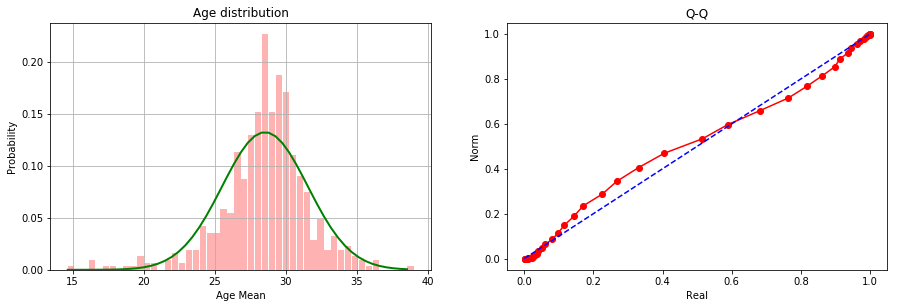

----------------------------------------------------------------------


In [4]:
size = 50

def run_for_3b_sub(cur_df):
    age_mean = cur_df.mean()
    age_std = cur_df.std()
    age_var = cur_df.var(ddof=1)
    w,p = stats.kstest(cur_df, 'norm',args=(age_mean, age_std))
    print 'mean:',age_mean
    print 'std :',age_std
    print 'var :',age_var
    print 'p-value:',p

    #按1的粒度切分数据进行分析
    x = np.arange( cur_df.min() , cur_df.max() , (cur_df.max() - cur_df.min())/size )
    #计算正态分布pdf
    y = norm.pdf( x, age_mean, age_std)

    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    #参数 颜色 线宽
    plt.plot( x , y , color = 'green' , linewidth = 2 )
    #数据 数组 颜色 颜色深浅 组宽 显示频率
    plt.hist( cur_df , bins = size , color = 'red' , alpha = 0.3 , rwidth = 0.9 , normed = True )
    plt.title('Age distribution')
    plt.xlabel('Age Mean')
    plt.ylabel('Probability')
    plt.grid( True )
    
    #绘制Q-Q图定性检验是否符合正态分布
    #实际统计频率
    xp = []
    for i in range(len(x)):
        xp.append( len(cur_df[cur_df<=x[i]]) * 1.0 / len(cur_df) )
    xp = np.array(xp)

    #正态分布累计概率
    yp = norm.cdf( x, age_mean, age_std)

    plt.subplot(2,2,2)
    #绘图查看结果
    plt.plot( xp , yp , 'ro-' )
    plt.plot( [0,1] , [0,1] , 'b--' )
    plt.title('Q-Q')
    plt.xlabel('Real')
    plt.ylabel('Norm')
    plt.show()
    pass

#计算各组数据
df_age_c = {}
for i in range(1,6):
    print '第' + str(i) + '组:'
    df_age_c[i] = df[df['群类别']==i]['平均年龄']
    run_for_3b_sub(df_age_c[i])
    print '----------------------------------------------------------------------'

__由图片观察及K-S检验结果得出：第4，5组不符合正态分布，下面进行齐性分析__

In [5]:
#方差齐性分析
args = []
for key in df_age_c:
    args.append(df_age_c[key])

#检验方差齐性
w,p = stats.levene(*args)
if p < 0.05:
    print '拒绝H0：方差不齐( ' + str(p) + ' < 0.05 )'
else:
    print w,p

拒绝H0：方差不齐( 9.6773551815e-49 < 0.05 )


__得出结论，部分组不符合正态分布，且方差齐性分析显示方差不齐__

## 3. c）Do the one-way ANOVA test for Col[7] with categories in Col[2]. Write down your conclusion, supporting statistics, and visualize your data which inspire the process

>__根据上述结果得知，本例中采样各组不完全符合正态分布且方差不齐，偏差过大，所以one-way ANOVA采用Kruskal Wallis H test方案进行__

In [6]:
w,p = stats.kruskal(*args)
if p < 0.05:
    print '拒绝H0：( ' + str(p) + ' < 0.05 )'
else:
    print '接受H0：( ' + str(p) + ' )'

拒绝H0：( 1.93074759749e-116 < 0.05 )


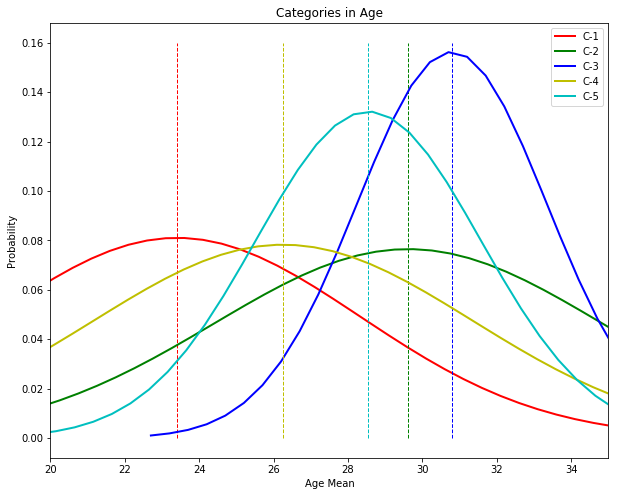

In [7]:
plt.figure(figsize=(10,8))
for key in df_age_c:
    curdf = df_age_c[key]
    mean = curdf.mean()
    std = curdf.std()
    x = np.arange( curdf.min() , curdf.max() , 0.5 )
    y = norm.pdf( x, mean, std)
    plt.plot( x , y , color = 'rgbyc'[key-1] , linewidth = 2 , label='C-' + str(key) )
    plt.plot( [mean,mean] , [0,0.16] , color = 'rgbyc'[key-1] , linestyle='--' , linewidth = 1 )

plt.title('Categories in Age')
plt.xlabel('Age Mean')
plt.ylabel('Probability')
plt.xlim(20,35)
plt.legend()
plt.show()

__由Kruskal Wallis H test方案得出结论：拒绝H0假设，各组平均年龄均值不完全相等，即分组对于年龄分布存在影响__

## 4. Choose another 3 columns, draw the empirical pdf of each feature columns and test which column follows these assumptions in question 1? How about their corresponding log transformation?

__首先测试各分组是否符合正态分布;__    
__选择$[性别比] [无回应比例] [地域集中度]$三个列进行测试分析__    

----------------------------------------------------------------------
[性别比] PDF图绘制及正态性符合测试


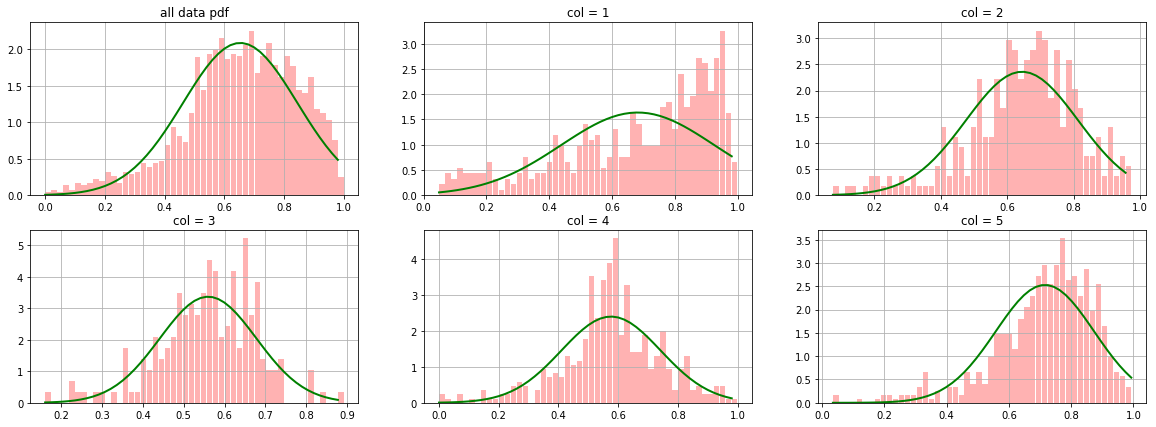

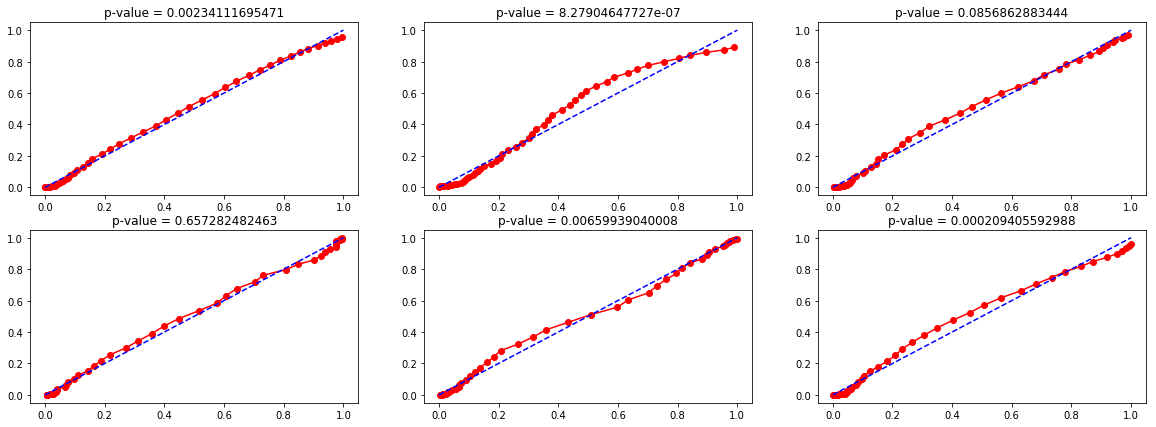

----------------------------------------------------------------------
[无回应比例] PDF图绘制及正态性符合测试


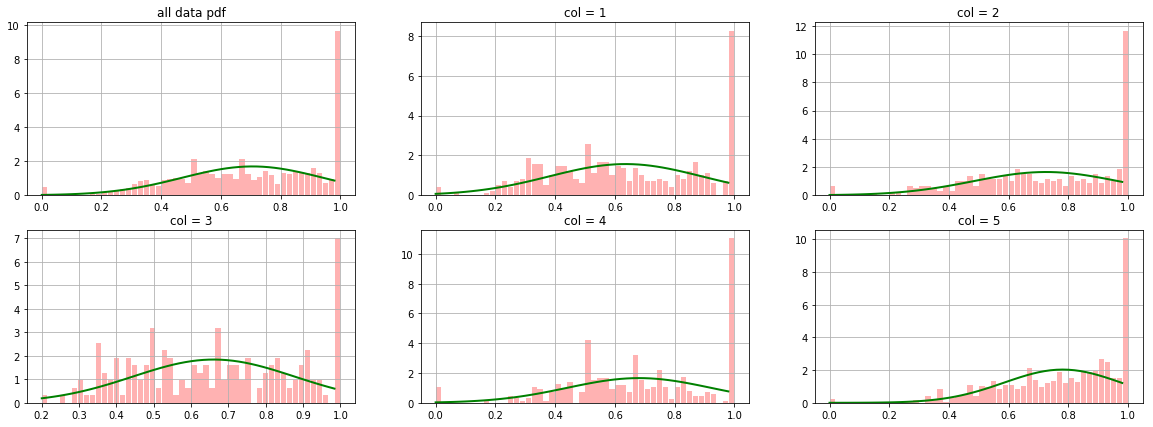

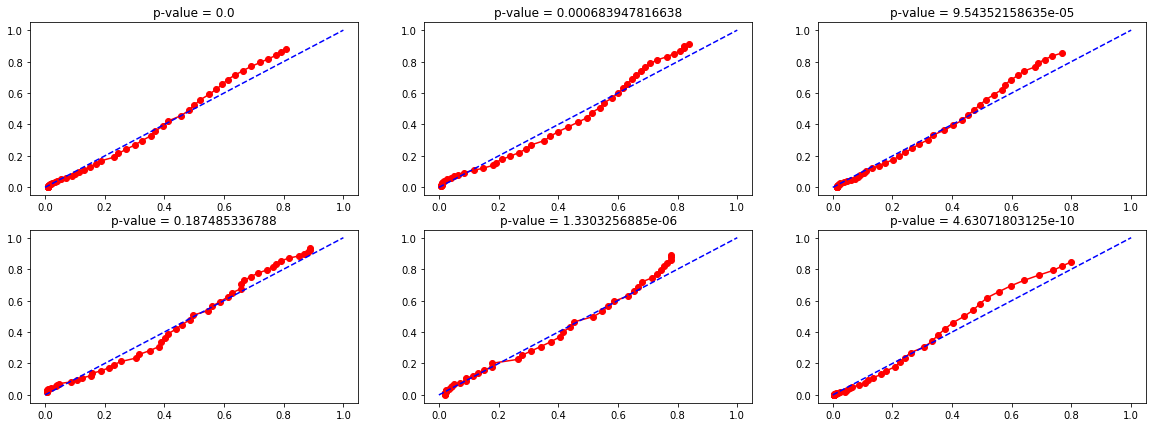

----------------------------------------------------------------------
[地域集中度] PDF图绘制及正态性符合测试


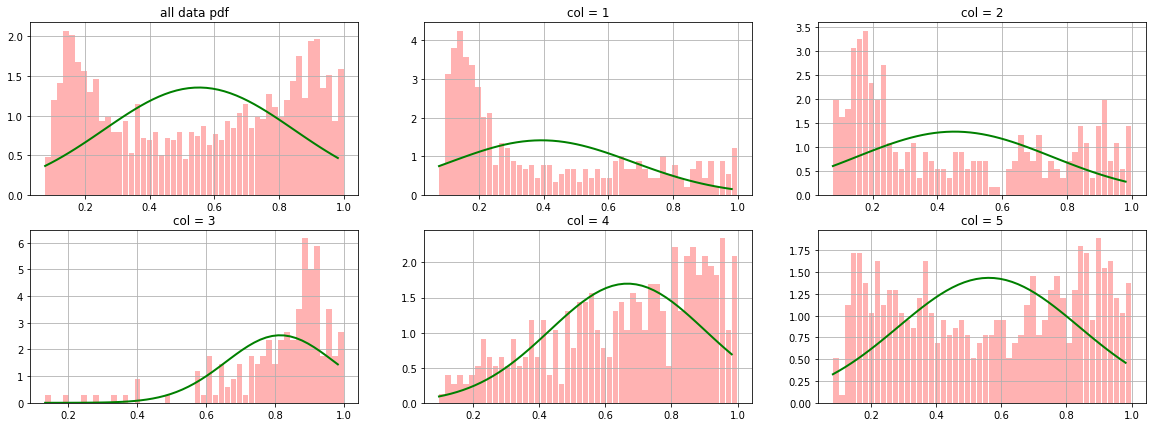

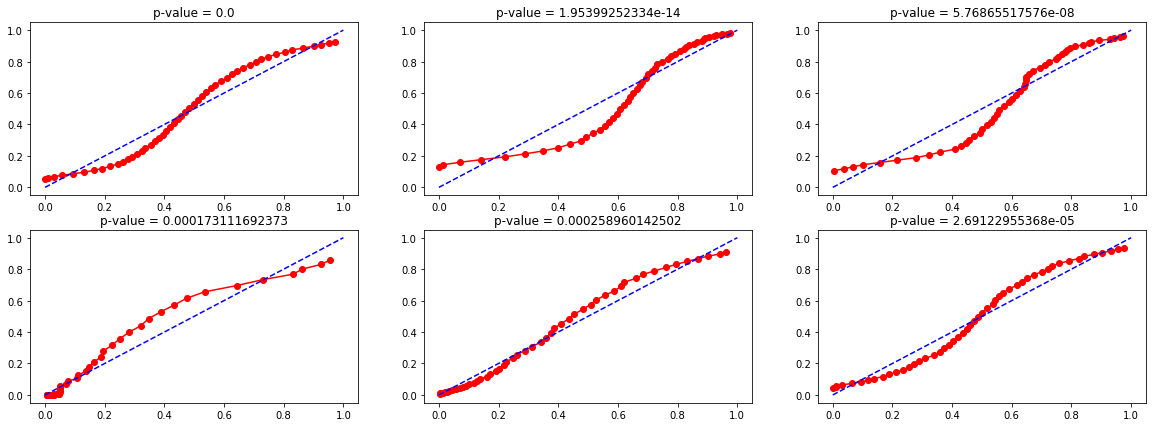

In [8]:
def show_data_pdf(plt_pdf,data,size):
    mean = data.mean()
    std = data.std()

    x = np.arange( data.min() , data.max() , (data.max()-data.min()) / size )
    y = norm.pdf( x, mean, std)
    
    #参数 颜色 线宽
    plt_pdf.plot( x , y , color = 'green' , linewidth = 2 )
    #数据 数组 颜色 颜色深浅 组宽 显示频率
    plt_pdf.hist( data , bins = size , color = 'red' , alpha = 0.3 , rwidth = 0.9 , normed = True )
    plt_pdf.grid( True )

def show_data_is_norm(plt_QQ,data,size):
    mean = data.mean()
    std = data.std()

    x = np.arange( data.min() , data.max() , (data.max()-data.min()) / size )
    y = norm.pdf( x, mean, std)

    #实际统计频率
    xp = []
    for i in range(len(x)):
        p = data[data<=x[i]]
        xp.append( len(p) * 1.0 / len(data) )
    xp = np.array(xp)

    #正态分布累计概率
    yp = norm.cdf( x, mean, std)
   
    w,p = stats.kstest(data, 'norm',args=(mean, std))
    
    #绘图查看结果
    plt_QQ.plot( xp , yp , 'ro-' )
    plt_QQ.plot( [0,1] , [0,1] , 'b--' )
    
    return p
    

def q_4_is_norm(col,size):
    print '----------------------------------------------------------------------'
    print '[' + col + '] PDF图绘制及正态性符合测试'
    
    #绘制PDF图
    plt.figure(figsize=(20,7))
    plt.subplot(2,3,1)
    show_data_pdf(plt,df[col],size)
    plt.title('all data pdf')
    for i in range(1,6):
        plt.subplot(2,3,i+1)
        show_data_pdf(plt,df[df['群类别']==i][col],size)
        plt.title('col = '+str(i))
    plt.show()
    
    #绘制Q-Q图
    plt.figure(figsize=(20,7))
    plt.subplot(2,3,1)
    p = show_data_is_norm(plt,df[col],size)
    plt.title('p-value = ' + str(p))
    
    for i in range(1,6):
        plt.subplot(2,3,i+1)
        p = show_data_is_norm(plt,df[df['群类别']==i][col],size)
        plt.title('p-value = ' + str(p))
    plt.show()
    pass

q_4_is_norm('性别比',50)
q_4_is_norm('无回应比例',50)
q_4_is_norm('地域集中度',50)

__由上述产生数据可以定性确认：$[性别比][无回应比例][地域集中度]$三个列基本都不完全符合正态分布，无论是整体还是各个分组__     
     
__下面对这三组数据进行对数转换并再次进行测试__

----------------------------------------------------------------------
[性别比] 数据取对数处理后的  PDF图绘制及正态性符合测试


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


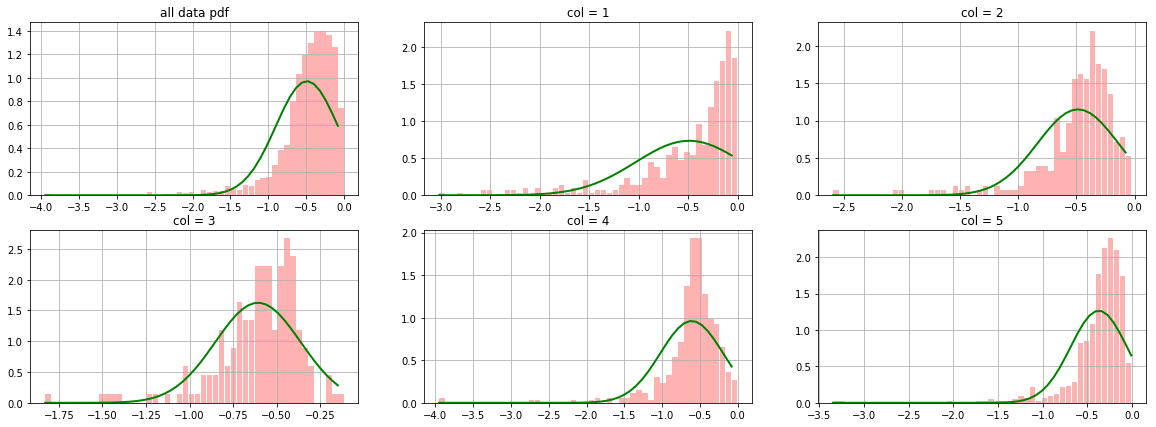

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log


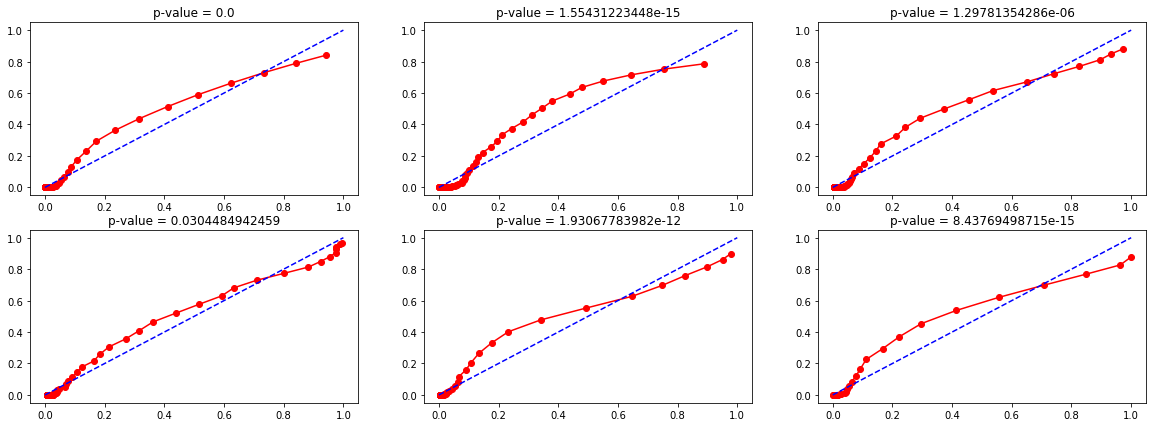

----------------------------------------------------------------------
[无回应比例] 数据取对数处理后的  PDF图绘制及正态性符合测试


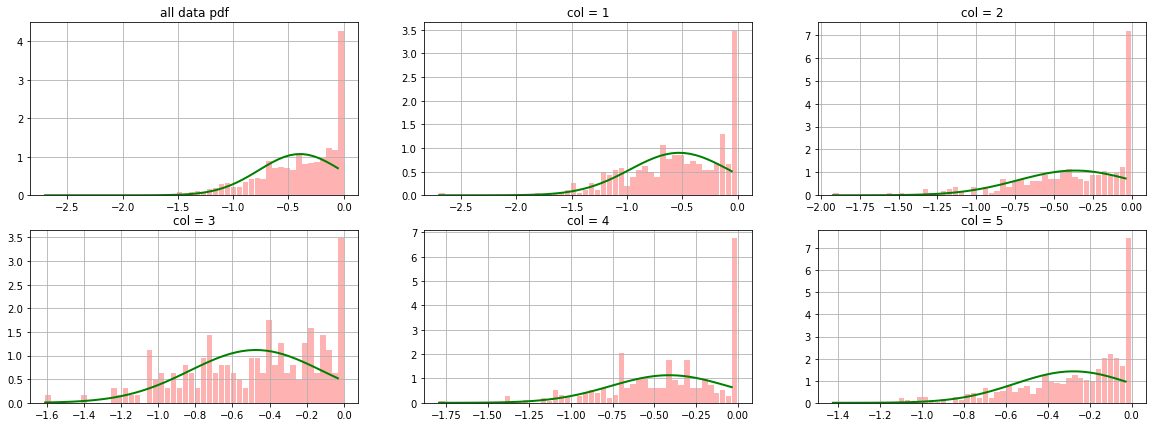

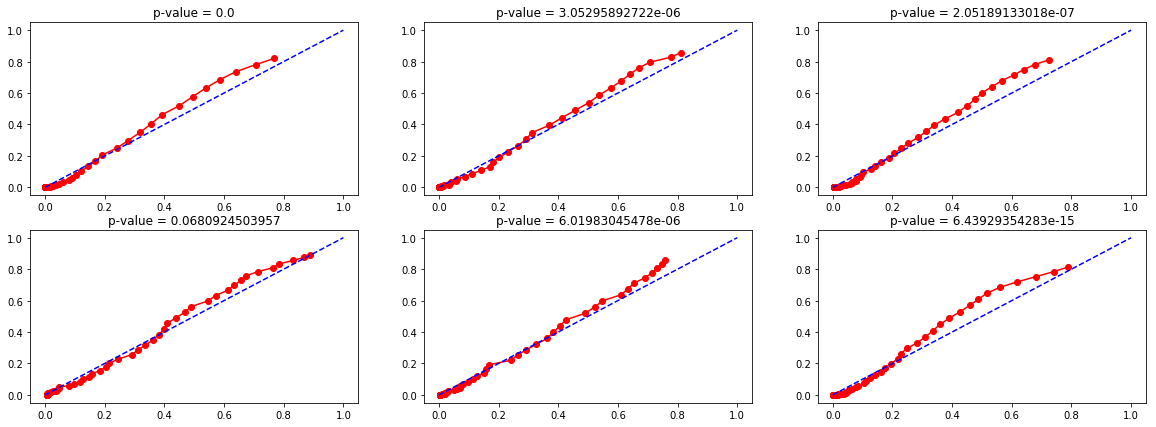

----------------------------------------------------------------------
[地域集中度] 数据取对数处理后的  PDF图绘制及正态性符合测试


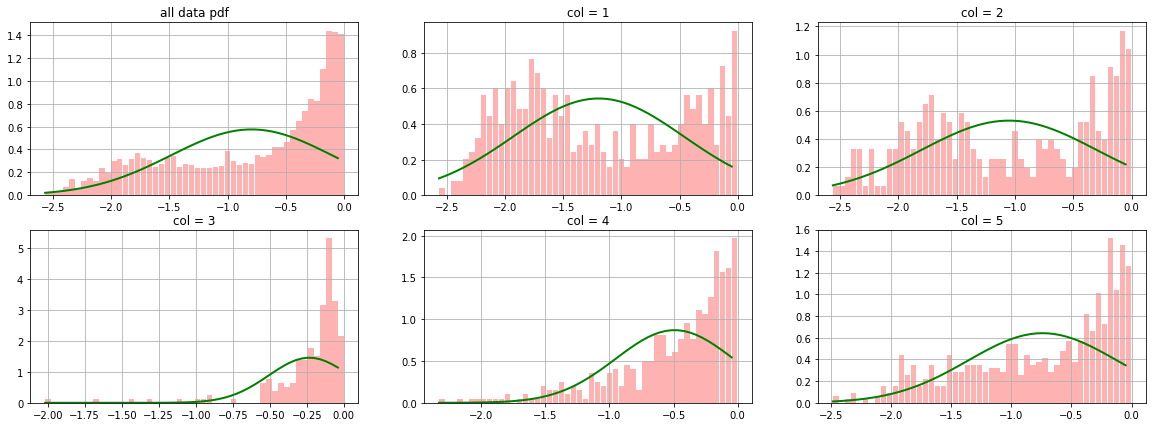

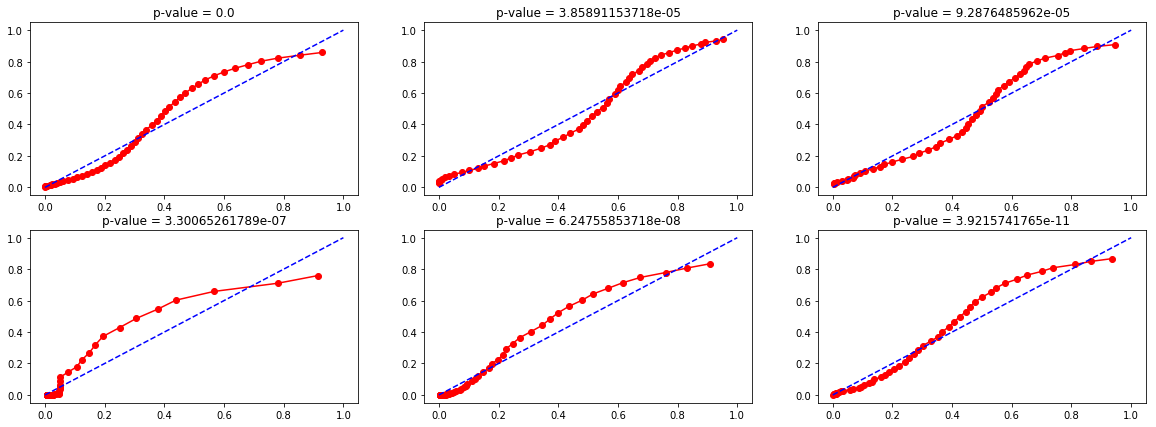

In [9]:
def clear_data(data):
    for ii in range(0,len(data)):
        if np.isinf(data[ii]) :
            data[ii] = max(data)
        elif np.isneginf(data[ii]):
            data[ii] = min(data)
            
    return data

def q_4_is_norm_log(col,size):
    print '----------------------------------------------------------------------'
    print '[' + col + '] 数据取对数处理后的  PDF图绘制及正态性符合测试'
    
    #绘制PDF图
    plt.figure(figsize=(20,7))
    plt.subplot(2,3,1)
    logdata = clear_data(np.log(df[col]))
    show_data_pdf(plt,logdata,size)
    plt.title('all data pdf')

    for i in range(1,6):
        plt.subplot(2,3,i+1)
        logdata = np.log(df[df['群类别']==i][col])
        logdata = clear_data(logdata.values)
        show_data_pdf(plt,logdata,size)
        plt.title('col = '+str(i))
    plt.show()

    #绘制Q-Q图
    plt.figure(figsize=(20,7))
    plt.subplot(2,3,1)
    logdata = clear_data(np.log(df[col]))
    p = show_data_is_norm(plt,logdata,size)
    plt.title('p-value = ' + str(p))
    
    for i in range(1,6):
        plt.subplot(2,3,i+1)
        logdata = np.log(df[df['群类别']==i][col])
        logdata = clear_data(logdata.values)
        p = show_data_is_norm(plt,logdata,size)
        plt.title('p-value = ' + str(p))
    plt.show()
    pass

q_4_is_norm_log('性别比',50)
q_4_is_norm_log('无回应比例',50)
q_4_is_norm_log('地域集中度',50)

__由上述产生数据可以定性确认：$[性别比][无回应比例][地域集中度]$三个列在进行了对数转换之后仍然不满足正态分布，无论是整体还是各个分组__     

## 5. How to do one-way ANOVA with the non-normal data? 
### a） Find and list the possible solutions set.

>__1.如果是极个别少数极端值数据导致不符合正态分布，那么可以尝试去除这些个别数据再进行正态检验;__    
>__2.如果整体都符合正态分布，那么尝试对数据进行一些变换，再对变换后的数据进行正态检验;__    
>__3.如果上述两种方案都不能解决，那么可以使用非参数Kruskal-Wallis秩和检验对数据进行分析。__

### b）Do the one-way ANOVA on the 3 columns you choose. Do these feature columns vary significantly? Visualize the results.
>__由于所选列数据不符合正态分布，且尝试多种变化后仍然不符合正态分布，那么选择使用非参数Kruskal-Wallis检验显著性：__

In [10]:
def q_5_b_check_vary(col):
    print '[' + col + ']'
    #装填参数，同时计算期望与方差
    args = []
    for i in range(1,6):
        coldata = df[df['群类别']==i][col]
        print str(i) + '组:' + 'mean=' +str(coldata.mean()) + '   std=' +str(coldata.std())
        args.append(coldata)
    #计算Kruskal-Wallis检验显著性
    w,p = stats.kruskal(*args)
    if p < 0.05:
        print 'kruskal:拒绝H0：( ' + str(p) + ' < 0.05 ) <<组间由显著差异>>'
    else:
        print 'kruskal:接受H0：( ' + str(p) + ' ) <<组间没有显著差异>>'
    pass

q_5_b_check_vary('性别比')
q_5_b_check_vary('无回应比例')
q_5_b_check_vary('地域集中度')

[性别比]
1组:mean=0.681709579467   std=0.243804387973
2组:mean=0.644813680947   std=0.169144198813
3组:mean=0.559834374714   std=0.118465203198
4组:mean=0.575879041908   std=0.166114163881
5组:mean=0.715954954387   std=0.157761404338
kruskal:拒绝H0：( 6.22572263299e-59 < 0.05 ) <<组间由显著差异>>
[无回应比例]
1组:mean=0.635782154083   std=0.254988130185
2组:mean=0.724698257683   std=0.242400079785
3组:mean=0.660582695709   std=0.216562797723
4组:mean=0.681048284228   std=0.240534255528
5组:mean=0.780549651825   std=0.196200444089
kruskal:拒绝H0：( 5.75493387775e-23 < 0.05 ) <<组间由显著差异>>
[地域集中度]
1组:mean=0.393420527151   std=0.2814000279
2组:mean=0.45290144739   std=0.301063410176
3组:mean=0.815356396827   std=0.157455633912
4组:mean=0.666743215134   std=0.235006332283
5组:mean=0.561676378271   std=0.27828929216
kruskal:拒绝H0：( 2.10274185322e-83 < 0.05 ) <<组间由显著差异>>


## 6. Choose any two categories, and classify them by logistical regression, or you can try multi-class classification on all categories

统计结果:
                          precision    recall  f1-score   support

           Online_Game_1      0.646     0.582     0.613        91
         School_Alumni_2      0.765     0.197     0.313        66
          House_Living_3      0.552     0.432     0.485        37
          Stock_Market_4      0.646     0.771     0.703        83
Organizations_Industry_5      0.558     0.771     0.647       131

             avg / total      0.629     0.605     0.582       408



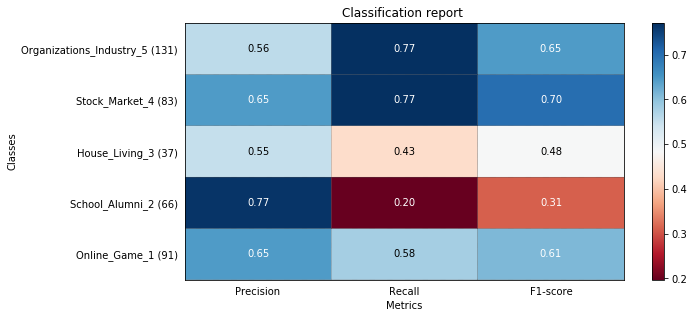

In [52]:
import scipy as sp  
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split

#8:2随机切分训练数据
X = df[df.columns[2:]]
Y = df['群类别']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

#逻辑回归
clf = LogisticRegression()
clf.fit(X_train, Y_train)
y_clf = clf.predict(X_test)

#显示统计结果
labels =[1,2,3,4,5]  
target_names = ['Online_Game_1','School_Alumni_2','House_Living_3','Stock_Market_4','Organizations_Industry_5']  
strclassification = classification_report(Y_test, y_clf,labels=labels,target_names= target_names,digits=3)
print u'统计结果:\n' + strclassification

#图形化显示结果
def show_values(pc, fmt="%.2f", **kw):
    from itertools import izip
    pc.update_scalarmappable()
    ax = pc.get_axes()
    for p, color, value in izip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)

def cm2inch(*tupl):
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)


plot_classification_report(strclassification)
plt.show()

__通过逻辑回归方式对数据的所有特征列进行回归分析，结果如上显示，其中F1数据为：__
# $F_1 = 2 \times \frac{precision \times recall}{precision + recall}$   
__通过对所有特征列进行逻辑分析，从上述f1-score结果可以得出结论：    
投资理财（Stock Market）分类效果最显著;    
游戏（Online Game） 和  行业交流（Organizations Industry）也具有一定的区分度;     
业主（House Living）效果不佳，同学会（School Alumni）区分度最差。
__